In [3]:
import pandas as pd

train = pd.read_csv('train_v9rqX0R.csv')

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
[train[col].unique() for col in train.columns if train[col].nunique() < 20]

[array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
        'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
        'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
        'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object),
 array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
        'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object),
 array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004]),
 array(['Medium', nan, 'High', 'Small'], dtype=object),
 array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object),
 array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object)]

In [6]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'Low Fat': 'Low Fat', 'reg': 'Regular'})
train['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular'], dtype=object)

In [7]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
train[['Item_Weight', 'Outlet_Size']]


,Item_Weight,Outlet_Size
0,9.300,Medium
1,5.920,Medium
2,17.500,Medium
3,19.200,NaN
4,8.930,High
...,...,...
8518,6.865,High
8519,8.380,NaN
8520,10.600,Small
8521,7.210,Medium


In [9]:
# Outlet size analysis
# outlet type should be linked to outlet size

# Count the occurrence of each outlet size for each outlet type
outlet_size_counts = train.groupby('Outlet_Type')['Outlet_Size'].value_counts().unstack(fill_value=0)
outlet_size_counts

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [10]:
train[['Outlet_Size', 'Outlet_Type']].drop_duplicates()


,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
3,NaN,Grocery Store
4,High,Supermarket Type1
7,Medium,Supermarket Type3
8,NaN,Supermarket Type1
11,Small,Supermarket Type1
23,Small,Grocery Store


In [11]:

# small - Grocery store, supermarket type1
# medium - supermarket type1, type2, type3
# high - supermarket type1
# so type 1 is in all 3

# counting supermarket type1 occurrences for outlet size
train[train['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].value_counts()


,count
Outlet_Size,
Small,1860
High,932
Medium,930


In [12]:

# look at the outlet identifier for supermarket type1, if there is any pattern which will help in filling missing outlet size
train[train['Outlet_Type']=='Supermarket Type1']['Outlet_Identifier'].unique()

array(['OUT049', 'OUT013', 'OUT045', 'OUT017', 'OUT046', 'OUT035'],
      dtype=object)

In [13]:
train[train['Outlet_Type']=='Supermarket Type1'][['Outlet_Identifier', 'Outlet_Size']].drop_duplicates()


,Outlet_Identifier,Outlet_Size
0,OUT049,Medium
4,OUT013,High
8,OUT045,NaN
9,OUT017,NaN
11,OUT046,Small
19,OUT035,Small


In [14]:
train[train['Outlet_Type']=='Supermarket Type1'][['Outlet_Location_Type', 'Outlet_Size']].drop_duplicates()


,Outlet_Location_Type,Outlet_Size
0,Tier 1,Medium
4,Tier 3,High
8,Tier 2,NaN
11,Tier 1,Small
19,Tier 2,Small


In [15]:
train[train['Outlet_Type']=='Supermarket Type1'][['Outlet_Establishment_Year', 'Outlet_Size']].drop_duplicates().sort_values(by='Outlet_Establishment_Year')


,Outlet_Establishment_Year,Outlet_Size
4,1987,High
11,1997,Small
0,1999,Medium
8,2002,NaN
19,2004,Small
9,2007,NaN


In [16]:

train[train['Outlet_Type']=='Supermarket Type1'][['Outlet_Location_Type', 'Outlet_Establishment_Year', 'Outlet_Size']].drop_duplicates()


,Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Size
0,Tier 1,1999,Medium
4,Tier 3,1987,High
8,Tier 2,2002,NaN
9,Tier 2,2007,NaN
11,Tier 1,1997,Small
19,Tier 2,2004,Small


In [17]:
# tier 2 in 2002 and 2007 outlet size is missing for supermarket 1

# fill missing value for outlet size based on Outlet_Type
train.loc[(train['Outlet_Type'] == 'Grocery Store') | (train['Outlet_Type'] == 'Supermarket Type1') & (train['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
train.loc[(train['Outlet_Type'] == 'Supermarket Type2') | (train['Outlet_Type'] == 'Supermarket Type3') & (train['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Medium'


In [18]:
# Verify that missing values in Outlet_Size have been filled
print("Missing values after filling Outlet_Size:")
print(train.isnull().sum())

Missing values after filling Outlet_Size:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [19]:
# Item_Weight
mean_weight = train['Item_Weight'].mean()
median_weight = train['Item_Weight'].median()


In [20]:
train['Item_Weight_mean'] = train['Item_Weight'].fillna(mean_weight)
train['Item_Weight_median'] = train['Item_Weight'].fillna(median_weight)


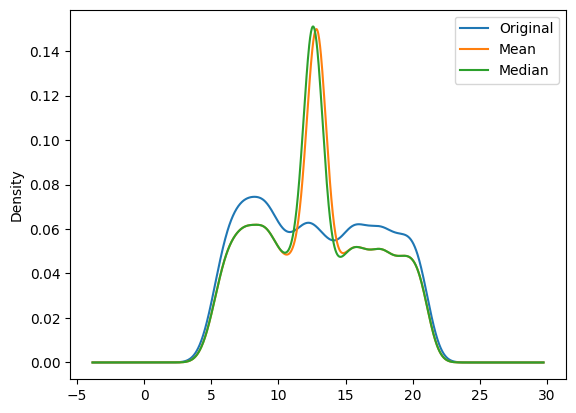

In [21]:
import matplotlib.pyplot as plt

train['Item_Weight'].plot(kind="kde", label="Original")
train['Item_Weight_mean'].plot(kind="kde", label="Mean")
train['Item_Weight_median'].plot(kind="kde", label="Median")
plt.legend()
plt.show()


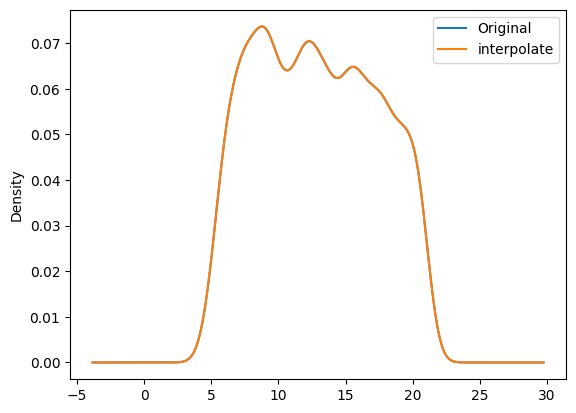

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean',
       'Item_Weight_median', 'Item_Weight_interpolate'],
      dtype='object')

In [22]:

train['Item_Weight_interpolate'] = train['Item_Weight'].interpolate(method="linear")
train['Item_Weight_interpolate'].plot(kind="kde", label="Original")
train['Item_Weight_interpolate'].plot(kind="kde", label="interpolate")
plt.legend()
plt.show()
train.columns


In [23]:

# Item_Visibility
train['Item_Visibility'].value_counts()


,count
Item_Visibility,
0.000000,526
0.076975,3
0.061271,2
0.046825,2
0.112399,2
...,...
0.054142,1
0.018920,1
0.044974,1


In [24]:

# there are 526 counts with 0 ? -> being 0 doesn't have any value add - almost like missing value
# consider 0 as missing and interpolate
import numpy as np
train['Item_Visibility'] = train['Item_Visibility'].replace(0, np.nan)
train['Item_Visibility_interpolate'] = train['Item_Visibility'].interpolate(method="linear")


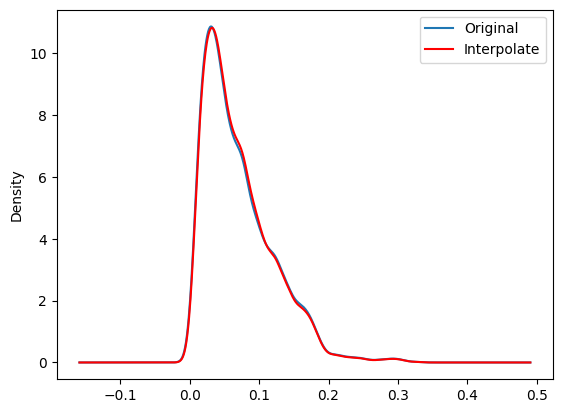

In [25]:

train['Item_Visibility'].plot(kind="kde", label="Original")
train['Item_Visibility_interpolate'].plot(kind="kde", color='red', label="Interpolate")
plt.legend()
plt.show()


In [26]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean',
       'Item_Weight_median', 'Item_Weight_interpolate',
       'Item_Visibility_interpolate'],
      dtype='object')

In [27]:
train['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


<Axes: >

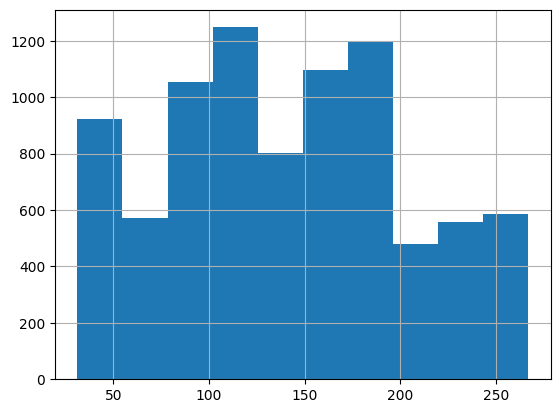

In [28]:
train['Item_MRP'].hist()


In [29]:
train['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [30]:
train['Outlet_Establishment_Year'].value_counts()


,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


In [31]:

train['outlet_age'] = 2025 - train['Outlet_Establishment_Year']
train[['Outlet_Identifier', 'outlet_age']].drop_duplicates().sort_values(by='outlet_age', ascending=False)


,Outlet_Identifier,outlet_age
23,OUT019,40
7,OUT027,40
4,OUT013,38
11,OUT046,28
3,OUT010,27
0,OUT049,26
8,OUT045,23
19,OUT035,21
9,OUT017,18
1,OUT018,16


In [32]:
# encoding categorical variables

train['Item_Identifier'] = train['Item_Identifier'].apply(lambda x: x[:2])
train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean',
       'Item_Weight_median', 'Item_Weight_interpolate',
       'Item_Visibility_interpolate', 'outlet_age'],
      dtype='object')

In [33]:

train = train[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
               'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
               'Item_Outlet_Sales', 'Item_Weight_interpolate', 'Item_Visibility_interpolate', 'outlet_age']]


In [34]:
from sklearn.preprocessing import OrdinalEncoder

train_encoded = train.copy()
cat_cols = train.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    train_encoded[col] = oe.fit_transform(train_encoded[[col]])
    print(oe.categories_)

train_encoded.head()


[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,9.30,0.016047,26
1,0.0,1.0,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,5.92,0.019278,16
2,1.0,0.0,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,17.50,0.016760,26
3,1.0,1.0,6.0,182.0950,0.0,1998,2.0,2.0,0.0,732.3800,19.20,0.015755,27
4,2.0,0.0,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052,8.93,0.014751,38


In [35]:
# Prepare features for modeling
X = train_encoded.drop('Item_Outlet_Sales', axis=1)
y = train_encoded['Item_Outlet_Sales']

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(scores.mean())


0.5553247266735589


In [36]:
# XGBRFRegressor
# !pip install xgboost

from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg, X, y, cv=5, scoring='r2')
print(scores.mean())


0.5950988316601599


In [37]:
# XGBRFRegressor Feature Importances
xg1 = xg.fit(X, y)
pd.DataFrame({
    'feature': X.columns,
    'XGBRF_importance': xg1.feature_importances_
}).sort_values(by='XGBRF_importance', ascending=False)


,feature,XGBRF_importance
8,Outlet_Type,0.528719
11,outlet_age,0.131179
3,Item_MRP,0.109200
5,Outlet_Establishment_Year,0.104478
4,Outlet_Identifier,0.073206
6,Outlet_Size,0.044190
7,Outlet_Location_Type,0.002829
10,Item_Visibility_interpolate,0.002042
9,Item_Weight_interpolate,0.001857
2,Item_Type,0.001298


In [38]:
# Train final XGBRF model and test split
xg_final = XGBRFRegressor()
xg_final.fit(X, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
xg_final.fit(X_train, y_train)
y_pred = xg_final.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


715.2228542909254


In [39]:
# Predict on test file
test = pd.read_csv('test_AbJTz2l.csv')
test_item_identifiers = test['Item_Identifier'].copy()
test_outlet_identifiers = test['Outlet_Identifier'].copy()


In [40]:

# Fill test set preprocessing
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
test.loc[(test['Outlet_Type'] == 'Grocery Store') | (test['Outlet_Type'] == 'Supermarket Type1') & (test['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
test.loc[(test['Outlet_Type'] == 'Supermarket Type2') | (test['Outlet_Type'] == 'Supermarket Type3') & (test['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Medium'
test['Item_Weight_interpolate'] = test['Item_Weight'].interpolate(method="linear")
test['Item_Visibility'] = test['Item_Visibility'].replace(0, np.nan)
test['Item_Visibility_interpolate'] = test['Item_Visibility'].interpolate(method="linear")
test['outlet_age'] = 2025 - test['Outlet_Establishment_Year']
test['Item_Identifier'] = test['Item_Identifier'].apply(lambda x: x[:2])

test = test[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
             'Item_Weight_interpolate', 'Item_Visibility_interpolate', 'outlet_age']]


In [41]:

test_encoded = test.copy()
cat_cols = test.select_dtypes(include=['object']).columns
for col in cat_cols:
    oe = OrdinalEncoder()
    test_encoded[col] = oe.fit_transform(test_encoded[[col]])
    print(oe.categories_)

predictions = xg_final.predict(test_encoded)


[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [42]:

submission_df = pd.DataFrame({
    'Item_Identifier': test_item_identifiers,
    'Outlet_Identifier': test_outlet_identifiers,
    'Item_Outlet_Sales': predictions
})
submission_df.to_csv('submission.csv', index=False)


In [43]:
# --- Feature Engineering: Interaction & Aggregate Features ---
# Add interaction features
train_encoded['MRP_Year'] = train_encoded['Item_MRP'] * train_encoded['Outlet_Establishment_Year']
test_encoded['MRP_Year'] = test_encoded['Item_MRP'] * test_encoded['Outlet_Establishment_Year']

train_encoded['Visibility_Weight'] = train_encoded['Item_Visibility_interpolate'] * train_encoded['Item_Weight_interpolate']
test_encoded['Visibility_Weight'] = test_encoded['Item_Visibility_interpolate'] * test_encoded['Item_Weight_interpolate']

# Aggregate statistics
item_type_sales = train_encoded.groupby('Item_Type')['Item_Outlet_Sales'].mean()
train_encoded['Item_Type_Avg_Sales'] = train_encoded['Item_Type'].map(item_type_sales)
test_encoded['Item_Type_Avg_Sales'] = test_encoded['Item_Type'].map(item_type_sales)

outlet_type_sales = train_encoded.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
train_encoded['Outlet_Type_Avg_Sales'] = train_encoded['Outlet_Type'].map(outlet_type_sales)
test_encoded['Outlet_Type_Avg_Sales'] = test_encoded['Outlet_Type'].map(outlet_type_sales)

print('New features added to train_encoded and test_encoded.')


New features added to train_encoded and test_encoded.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 16
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

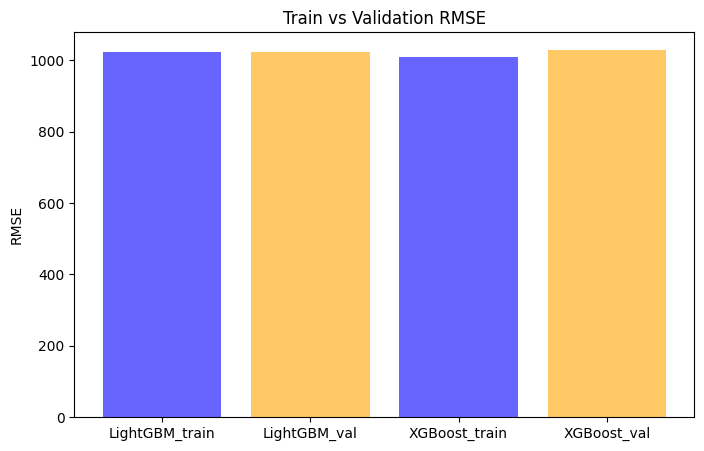

Best LightGBM params: {'subsample': 0.7, 'num_leaves': 70, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01}
Best XGBoost params: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Train vs Validation RMSE: {'LightGBM': (1021.6676074749328, 1023.7421035608505), 'XGBoost': (1007.4986574834828, 1026.9663959799602)}


In [44]:
# !pip install lightgbm

# --- Model Training: LightGBM & XGBoost with Hyperparameter Tuning ---
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = train_encoded.drop(['Item_Outlet_Sales'], axis=1)
y = train_encoded['Item_Outlet_Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM hyperparameter tuning
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_params = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'subsample': [0.7, 0.8, 1.0]
}
lgb_search = RandomizedSearchCV(lgb_model, lgb_params, n_iter=10, scoring='neg_root_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
lgb_search.fit(X_train, y_train)
lgb_best = lgb_search.best_estimator_

# XGBoost hyperparameter tuning
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, scoring='neg_root_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_

# Train vs Validation RMSE
models = {'LightGBM': lgb_best, 'XGBoost': xgb_best}
results = {}
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    val_rmse = root_mean_squared_error(y_val, y_val_pred)
    results[name] = (train_rmse, val_rmse)

# Plot
plt.figure(figsize=(8,5))
for name, (train_rmse, val_rmse) in results.items():
    plt.bar(name + '_train', train_rmse, color='blue', alpha=0.6)
    plt.bar(name + '_val', val_rmse, color='orange', alpha=0.6)
plt.ylabel('RMSE')
plt.title('Train vs Validation RMSE')
plt.show()

print('Best LightGBM params:', lgb_search.best_params_)
print('Best XGBoost params:', xgb_search.best_params_)
print('Train vs Validation RMSE:', results)


In [45]:
# Predictions and submission for LightGBM
predictions = lgb_best.predict(test_encoded)
submission_df = pd.DataFrame({
    'Item_Identifier': test_item_identifiers,
    'Outlet_Identifier': test_outlet_identifiers,
    'Item_Outlet_Sales': predictions
})
submission_df.to_csv('submission.csv', index=False)


In [46]:
!pip install optuna catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 13.8 MB/s eta 0:00:00


In [47]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1, 20),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 42
    }
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    train_rmse = root_mean_squared_error(y_train, train_preds)
    val_rmse = root_mean_squared_error(y_val, val_preds)
    print(f"Trial {trial.number}: train RMSE={train_rmse:.4f}, val RMSE={val_rmse:.4f}")
    return val_rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best trial params:")
print(study.best_trial.params)

# Train final model with best params
best_params = study.best_trial.params
best_params['verbose'] = 0
best_params['random_state'] = 42
cat_optuna = CatBoostRegressor(**best_params)
cat_optuna.fit(X, y)

# Print best train and validation RMSE for the best model
train_preds = cat_optuna.predict(X_train)
val_preds = cat_optuna.predict(X_val)
best_train_rmse = root_mean_squared_error(y_train, train_preds)
best_val_rmse = root_mean_squared_error(y_val, val_preds)
print(f"Best CatBoost (Optuna) train RMSE: {best_train_rmse:.4f}")
print(f"Best CatBoost (Optuna) validation RMSE: {best_val_rmse:.4f}")

# Predict on test set
cat_optuna_preds = cat_optuna.predict(test_encoded)
cat_optuna_preds[cat_optuna_preds < 0] = 0

submission_df = pd.DataFrame({
    'Item_Identifier': test_item_identifiers,
    'Outlet_Identifier': test_outlet_identifiers,
    'Item_Outlet_Sales': cat_optuna_preds
})
submission_df.to_csv('submission_catboost_optuna_adv_feat.csv', index=False)


[I 2025-08-29 12:27:41,947] A new study created in memory with name: no-name-06777fda-e2f7-4bea-a4fb-585232867eff
[I 2025-08-29 12:27:44,468] Trial 0 finished with value: 1030.9783236392843 and parameters: {'depth': 5, 'learning_rate': 0.07732759868978738, 'iterations': 393, 'l2_leaf_reg': 3.9179687007278896, 'bagging_temperature': 0.7770834209275463, 'random_strength': 19.090053965204863, 'border_count': 241}. Best is trial 0 with value: 1030.9783236392843.


Trial 0: train RMSE=981.4418, val RMSE=1030.9783


[I 2025-08-29 12:27:56,313] Trial 1 finished with value: 1056.7721165145333 and parameters: {'depth': 9, 'learning_rate': 0.06741462556420058, 'iterations': 585, 'l2_leaf_reg': 9.781324382564316, 'bagging_temperature': 0.7752481778715368, 'random_strength': 2.6680889918282027, 'border_count': 136}. Best is trial 0 with value: 1030.9783236392843.


Trial 1: train RMSE=752.6465, val RMSE=1056.7721


[I 2025-08-29 12:27:58,681] Trial 2 finished with value: 1018.0754420237411 and parameters: {'depth': 6, 'learning_rate': 0.021656537003220122, 'iterations': 366, 'l2_leaf_reg': 3.1792110007814607, 'bagging_temperature': 0.7838189847752106, 'random_strength': 5.382926145683377, 'border_count': 78}. Best is trial 2 with value: 1018.0754420237411.


Trial 2: train RMSE=1063.4700, val RMSE=1018.0754


[I 2025-08-29 12:28:03,518] Trial 3 finished with value: 1038.6143813033434 and parameters: {'depth': 4, 'learning_rate': 0.13889347601759416, 'iterations': 535, 'l2_leaf_reg': 8.08140041414497, 'bagging_temperature': 0.7143034220654212, 'random_strength': 15.713483627652701, 'border_count': 243}. Best is trial 2 with value: 1018.0754420237411.


Trial 3: train RMSE=945.3149, val RMSE=1038.6144


[I 2025-08-29 12:28:05,817] Trial 4 finished with value: 1043.3657247843053 and parameters: {'depth': 4, 'learning_rate': 0.12328406263855424, 'iterations': 468, 'l2_leaf_reg': 1.8032184677196077, 'bagging_temperature': 0.7020839452510595, 'random_strength': 9.382974384672536, 'border_count': 69}. Best is trial 2 with value: 1018.0754420237411.


Trial 4: train RMSE=948.7393, val RMSE=1043.3657


[I 2025-08-29 12:28:11,574] Trial 5 finished with value: 1068.7109862519246 and parameters: {'depth': 6, 'learning_rate': 0.07954083258191139, 'iterations': 733, 'l2_leaf_reg': 1.5437839073501047, 'bagging_temperature': 0.5601439506201168, 'random_strength': 7.857378468205814, 'border_count': 75}. Best is trial 2 with value: 1018.0754420237411.


Trial 5: train RMSE=790.6149, val RMSE=1068.7110


[I 2025-08-29 12:28:14,177] Trial 6 finished with value: 1019.2610116796582 and parameters: {'depth': 6, 'learning_rate': 0.015630591450797586, 'iterations': 943, 'l2_leaf_reg': 8.27441263042757, 'bagging_temperature': 0.5249227938981168, 'random_strength': 15.573380695737523, 'border_count': 46}. Best is trial 2 with value: 1018.0754420237411.


Trial 6: train RMSE=1037.0780, val RMSE=1019.2610


[I 2025-08-29 12:28:16,918] Trial 7 finished with value: 1066.0771041491107 and parameters: {'depth': 5, 'learning_rate': 0.11455184097516162, 'iterations': 764, 'l2_leaf_reg': 7.6998308400781585, 'bagging_temperature': 0.2269811781864921, 'random_strength': 18.41970607404463, 'border_count': 84}. Best is trial 2 with value: 1018.0754420237411.


Trial 7: train RMSE=852.9216, val RMSE=1066.0771


[I 2025-08-29 12:28:18,475] Trial 8 finished with value: 1025.4477237306548 and parameters: {'depth': 6, 'learning_rate': 0.10176018075484192, 'iterations': 236, 'l2_leaf_reg': 7.7180312127326465, 'bagging_temperature': 0.46959209378517264, 'random_strength': 15.684440837529868, 'border_count': 104}. Best is trial 2 with value: 1018.0754420237411.


Trial 8: train RMSE=983.2049, val RMSE=1025.4477


[I 2025-08-29 12:28:32,000] Trial 9 finished with value: 1077.237254533841 and parameters: {'depth': 8, 'learning_rate': 0.07095614952537665, 'iterations': 872, 'l2_leaf_reg': 8.856975711251291, 'bagging_temperature': 0.23389771559582972, 'random_strength': 1.0196233310833032, 'border_count': 152}. Best is trial 2 with value: 1018.0754420237411.


Trial 9: train RMSE=696.1249, val RMSE=1077.2373


[I 2025-08-29 12:28:39,574] Trial 10 finished with value: 1095.0433755645633 and parameters: {'depth': 10, 'learning_rate': 0.19849983024250978, 'iterations': 263, 'l2_leaf_reg': 4.224714970549933, 'bagging_temperature': 0.9649689526869005, 'random_strength': 5.3886336665476176, 'border_count': 164}. Best is trial 2 with value: 1018.0754420237411.


Trial 10: train RMSE=533.9119, val RMSE=1095.0434


[I 2025-08-29 12:28:44,084] Trial 11 finished with value: 1021.4182231940097 and parameters: {'depth': 7, 'learning_rate': 0.015238278813009914, 'iterations': 975, 'l2_leaf_reg': 5.891379686215078, 'bagging_temperature': 0.44193931716657525, 'random_strength': 12.373112487687752, 'border_count': 36}. Best is trial 2 with value: 1018.0754420237411.


Trial 11: train RMSE=1008.1680, val RMSE=1021.4182


[I 2025-08-29 12:28:44,896] Trial 12 finished with value: 1029.030052865565 and parameters: {'depth': 7, 'learning_rate': 0.010504991035266866, 'iterations': 374, 'l2_leaf_reg': 5.79806479776058, 'bagging_temperature': 0.9797777711287089, 'random_strength': 12.640883295561547, 'border_count': 32}. Best is trial 2 with value: 1018.0754420237411.


Trial 12: train RMSE=1086.0328, val RMSE=1029.0301


[I 2025-08-29 12:28:46,497] Trial 13 finished with value: 1036.4109831571088 and parameters: {'depth': 6, 'learning_rate': 0.0370043192405327, 'iterations': 722, 'l2_leaf_reg': 3.3364588240418134, 'bagging_temperature': 0.38746167248650226, 'random_strength': 5.924024166159913, 'border_count': 109}. Best is trial 2 with value: 1018.0754420237411.


Trial 13: train RMSE=939.2620, val RMSE=1036.4110


[I 2025-08-29 12:28:57,615] Trial 14 finished with value: 1055.557750252217 and parameters: {'depth': 8, 'learning_rate': 0.0425897763433197, 'iterations': 966, 'l2_leaf_reg': 6.779729318244541, 'bagging_temperature': 0.5873477333192119, 'random_strength': 12.26061372951085, 'border_count': 192}. Best is trial 2 with value: 1018.0754420237411.


Trial 14: train RMSE=799.4820, val RMSE=1055.5578


[I 2025-08-29 12:29:00,292] Trial 15 finished with value: 1035.5437301906463 and parameters: {'depth': 5, 'learning_rate': 0.040802705472915396, 'iterations': 645, 'l2_leaf_reg': 2.7559553365139884, 'bagging_temperature': 0.8826395670613937, 'random_strength': 15.26769193745579, 'border_count': 57}. Best is trial 2 with value: 1018.0754420237411.


Trial 15: train RMSE=990.3381, val RMSE=1035.5437


[I 2025-08-29 12:29:01,664] Trial 16 finished with value: 1078.8344130773394 and parameters: {'depth': 8, 'learning_rate': 0.14757140565607518, 'iterations': 340, 'l2_leaf_reg': 4.846910544078391, 'bagging_temperature': 5.759562907359239e-05, 'random_strength': 4.383929746482817, 'border_count': 114}. Best is trial 2 with value: 1018.0754420237411.


Trial 16: train RMSE=700.3242, val RMSE=1078.8344


[I 2025-08-29 12:29:04,607] Trial 17 finished with value: 1037.2106167791244 and parameters: {'depth': 6, 'learning_rate': 0.03229097099675746, 'iterations': 850, 'l2_leaf_reg': 9.816574408479479, 'bagging_temperature': 0.6592283414892239, 'random_strength': 8.899937631691587, 'border_count': 52}. Best is trial 2 with value: 1018.0754420237411.


Trial 17: train RMSE=967.2454, val RMSE=1037.2106


[I 2025-08-29 12:29:09,086] Trial 18 finished with value: 1108.5314201400324 and parameters: {'depth': 7, 'learning_rate': 0.17682046603780885, 'iterations': 488, 'l2_leaf_reg': 2.664128437405198, 'bagging_temperature': 0.29000553975071597, 'random_strength': 7.334261112167215, 'border_count': 94}. Best is trial 2 with value: 1018.0754420237411.


Trial 18: train RMSE=622.3959, val RMSE=1108.5314


[I 2025-08-29 12:29:12,261] Trial 19 finished with value: 1036.813086428223 and parameters: {'depth': 5, 'learning_rate': 0.057407240196732726, 'iterations': 648, 'l2_leaf_reg': 6.673125400121623, 'bagging_temperature': 0.8484393088983011, 'random_strength': 10.540680103407212, 'border_count': 128}. Best is trial 2 with value: 1018.0754420237411.


Trial 19: train RMSE=959.4380, val RMSE=1036.8131


[I 2025-08-29 12:29:33,845] Trial 20 finished with value: 1093.3464470539716 and parameters: {'depth': 9, 'learning_rate': 0.09480455832624038, 'iterations': 833, 'l2_leaf_reg': 5.0788478826907095, 'bagging_temperature': 0.5813630714752346, 'random_strength': 17.68754627315887, 'border_count': 209}. Best is trial 2 with value: 1018.0754420237411.


Trial 20: train RMSE=541.7719, val RMSE=1093.3464


[I 2025-08-29 12:29:38,767] Trial 21 finished with value: 1018.7823294294543 and parameters: {'depth': 7, 'learning_rate': 0.012927447669734396, 'iterations': 977, 'l2_leaf_reg': 6.390428243631216, 'bagging_temperature': 0.40690272105682024, 'random_strength': 13.02132688536559, 'border_count': 37}. Best is trial 2 with value: 1018.0754420237411.


Trial 21: train RMSE=1029.8047, val RMSE=1018.7823


[I 2025-08-29 12:29:42,154] Trial 22 finished with value: 1028.4057862857176 and parameters: {'depth': 6, 'learning_rate': 0.021554000356230826, 'iterations': 909, 'l2_leaf_reg': 6.615575373083185, 'bagging_temperature': 0.33871752537106414, 'random_strength': 13.996666222310578, 'border_count': 51}. Best is trial 2 with value: 1018.0754420237411.


Trial 22: train RMSE=1000.7234, val RMSE=1028.4058


[I 2025-08-29 12:29:48,219] Trial 23 finished with value: 1060.4679424645112 and parameters: {'depth': 7, 'learning_rate': 0.0529443629282641, 'iterations': 994, 'l2_leaf_reg': 8.507545635095706, 'bagging_temperature': 0.06823953263283805, 'random_strength': 11.296803805694356, 'border_count': 66}. Best is trial 2 with value: 1018.0754420237411.


Trial 23: train RMSE=810.0015, val RMSE=1060.4679


[I 2025-08-29 12:29:54,598] Trial 24 finished with value: 1032.0890830958438 and parameters: {'depth': 8, 'learning_rate': 0.02734490384891701, 'iterations': 774, 'l2_leaf_reg': 7.0324846060138215, 'bagging_temperature': 0.5013527395880418, 'random_strength': 16.760819399915825, 'border_count': 41}. Best is trial 2 with value: 1018.0754420237411.


Trial 24: train RMSE=926.9925, val RMSE=1032.0891


[I 2025-08-29 12:29:59,024] Trial 25 finished with value: 1018.09897146715 and parameters: {'depth': 6, 'learning_rate': 0.01128485937077099, 'iterations': 932, 'l2_leaf_reg': 1.0039799478124722, 'bagging_temperature': 0.1180675984007587, 'random_strength': 12.728437083981422, 'border_count': 83}. Best is trial 2 with value: 1018.0754420237411.


Trial 25: train RMSE=1054.5140, val RMSE=1018.0990


[I 2025-08-29 12:30:03,073] Trial 26 finished with value: 1071.971177110962 and parameters: {'depth': 7, 'learning_rate': 0.052225813829526076, 'iterations': 900, 'l2_leaf_reg': 1.12891519752643, 'bagging_temperature': 0.19451463823113807, 'random_strength': 14.16259976526286, 'border_count': 89}. Best is trial 2 with value: 1018.0754420237411.


Trial 26: train RMSE=745.5395, val RMSE=1071.9712


[I 2025-08-29 12:30:04,451] Trial 27 finished with value: 1026.1955879686218 and parameters: {'depth': 5, 'learning_rate': 0.024813342378920973, 'iterations': 805, 'l2_leaf_reg': 2.2681119094781446, 'bagging_temperature': 0.11160729529849095, 'random_strength': 9.732702070314172, 'border_count': 75}. Best is trial 2 with value: 1018.0754420237411.


Trial 27: train RMSE=1017.4456, val RMSE=1026.1956


[I 2025-08-29 12:30:05,344] Trial 28 finished with value: 1036.027815375763 and parameters: {'depth': 7, 'learning_rate': 0.01031990650844591, 'iterations': 305, 'l2_leaf_reg': 3.4826128397947835, 'bagging_temperature': 0.12462814969525038, 'random_strength': 13.713001876551763, 'border_count': 123}. Best is trial 2 with value: 1018.0754420237411.


Trial 28: train RMSE=1096.8999, val RMSE=1036.0278


[I 2025-08-29 12:30:06,090] Trial 29 finished with value: 1035.3035425928485 and parameters: {'depth': 4, 'learning_rate': 0.08675306979797419, 'iterations': 433, 'l2_leaf_reg': 3.9823250764873093, 'bagging_temperature': 0.3298702345830672, 'random_strength': 7.528369108548433, 'border_count': 170}. Best is trial 2 with value: 1018.0754420237411.


Trial 29: train RMSE=992.9107, val RMSE=1035.3035
Best trial params:
{'depth': 6, 'learning_rate': 0.021656537003220122, 'iterations': 366, 'l2_leaf_reg': 3.1792110007814607, 'bagging_temperature': 0.7838189847752106, 'random_strength': 5.382926145683377, 'border_count': 78}
Best CatBoost (Optuna) train RMSE: 1068.1624
Best CatBoost (Optuna) validation RMSE: 995.5683


In [48]:
# Advanced Feature Engineering

# Advanced Item-based features
train_encoded['Item_MRP_Log'] = np.log1p(train_encoded['Item_MRP'])
test_encoded['Item_MRP_Log'] = np.log1p(test_encoded['Item_MRP'])

# MRP binning (create numerical bins from continuous)
train_encoded['MRP_Bins'] = pd.cut(train_encoded['Item_MRP'], bins=5, labels=[0,1,2,3,4]).astype(int)
test_encoded['MRP_Bins'] = pd.cut(test_encoded['Item_MRP'], bins=5, labels=[0,1,2,3,4]).astype(int)

# Visibility ratios and transformations
train_encoded['Visibility_Sqrt'] = np.sqrt(train_encoded['Item_Visibility_interpolate'])
test_encoded['Visibility_Sqrt'] = np.sqrt(test_encoded['Item_Visibility_interpolate'])

train_encoded['MRP_Weight_Ratio'] = train_encoded['Item_MRP'] / (train_encoded['Item_Weight_interpolate'] + 1)
test_encoded['MRP_Weight_Ratio'] = test_encoded['Item_MRP'] / (test_encoded['Item_Weight_interpolate'] + 1)

train_encoded['Age_MRP_Interaction'] = train_encoded['outlet_age'] * train_encoded['Item_MRP'] / 1000
test_encoded['Age_MRP_Interaction'] = test_encoded['outlet_age'] * test_encoded['Item_MRP'] / 1000

# Outlet density features (count of items per outlet)
outlet_item_count = train_encoded.groupby('Outlet_Identifier').size()
train_encoded['Outlet_Item_Count'] = train_encoded['Outlet_Identifier'].map(outlet_item_count)
test_encoded['Outlet_Item_Count'] = test_encoded['Outlet_Identifier'].map(outlet_item_count)

# Item popularity across outlets
item_outlet_count = train_encoded.groupby('Item_Identifier').size()
train_encoded['Item_Popularity'] = train_encoded['Item_Identifier'].map(item_outlet_count)
test_encoded['Item_Popularity'] = test_encoded['Item_Identifier'].map(item_outlet_count)

print("Advanced features created successfully!")


Advanced features created successfully!


## feature selection

Total features before selection: 23
Combined selected features: 23


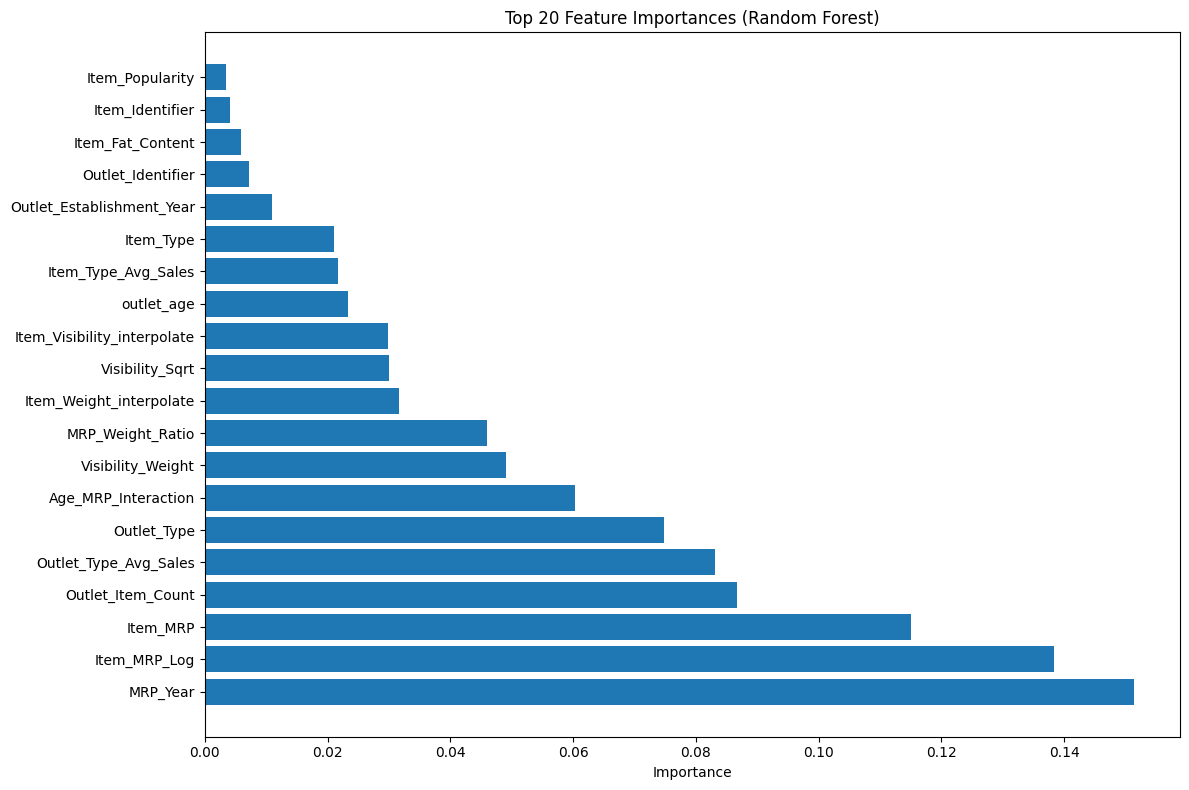

Feature selection completed!


In [49]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Prepare data for feature selection
X_all = train_encoded.drop(['Item_Outlet_Sales'], axis=1)
y_all = train_encoded['Item_Outlet_Sales']

print(f"Total features before selection: {X_all.shape[1]}")

# Method 1: Statistical feature selection (f-test)
selector_f = SelectKBest(score_func=f_regression, k=20)
X_selected_f = selector_f.fit_transform(X_all, y_all)
selected_features_f = X_all.columns[selector_f.get_support()]

# Method 2: Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_regression, k=20)
X_selected_mi = selector_mi.fit_transform(X_all, y_all)
selected_features_mi = X_all.columns[selector_mi.get_support()]

# Method 3: Random Forest Feature Importance
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(X_all, y_all)
feature_importance = pd.DataFrame({
    'feature': X_all.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

top_features_rf = feature_importance.head(20)['feature'].tolist()

# Combine all methods and find intersection
all_selected = set(selected_features_f) | set(selected_features_mi) | set(top_features_rf)
print(f"Combined selected features: {len(all_selected)}")

# Visualize Feature Importance
plt.figure(figsize=(12, 8))
plt.barh(range(20), feature_importance.head(20)['importance'])
plt.yticks(range(20), feature_importance.head(20)['feature'])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
print("Feature selection completed!")


## catboost optuna with selected features

In [50]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Use selected features for modeling
X_selected = X_all[list(all_selected)]
y_all = train_encoded['Item_Outlet_Sales']
X_train, X_val, y_train, y_val = train_test_split(X_selected, y_all, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1, 20),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'random_state': 42
    }
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    train_rmse = root_mean_squared_error(y_train, train_preds)
    val_rmse = root_mean_squared_error(y_val, val_preds)
    print(f"Trial {trial.number}: train RMSE={train_rmse:.4f}, val RMSE={val_rmse:.4f}")
    return val_rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best trial params:")
print(study.best_trial.params)

# Train final model with best params
best_params = study.best_trial.params
best_params['verbose'] = 0
best_params['random_state'] = 42
cat_optuna = CatBoostRegressor(**best_params)
cat_optuna.fit(X_selected, y_all)

# Predict with best optuna CatBoost model
cat_optuna_preds = cat_optuna.predict(test_encoded[list(all_selected)])
cat_optuna_preds[cat_optuna_preds < 0] = 0

submission_df = pd.DataFrame({
    'Item_Identifier': test_item_identifiers,
    'Outlet_Identifier': test_outlet_identifiers,
    'Item_Outlet_Sales': cat_optuna_preds
})
submission_df.to_csv('submission_catboost_optuna_adv_feat_v3.csv', index=False)


[I 2025-08-29 12:30:57,833] A new study created in memory with name: no-name-64c80fab-0dd9-404b-9b9c-4a190435e933
[I 2025-08-29 12:31:11,761] Trial 0 finished with value: 1032.226042800498 and parameters: {'depth': 8, 'learning_rate': 0.03857961494792747, 'iterations': 470, 'l2_leaf_reg': 4.303328694171089, 'bagging_temperature': 0.9349450651514164, 'random_strength': 11.183265197877764, 'border_count': 248}. Best is trial 0 with value: 1032.226042800498.


Trial 0: train RMSE=929.1049, val RMSE=1032.2260


[I 2025-08-29 12:31:14,446] Trial 1 finished with value: 1036.3025594231633 and parameters: {'depth': 4, 'learning_rate': 0.1409475112041503, 'iterations': 373, 'l2_leaf_reg': 9.874361912250967, 'bagging_temperature': 0.33938073964501503, 'random_strength': 1.9669090666093108, 'border_count': 93}. Best is trial 0 with value: 1032.226042800498.


Trial 1: train RMSE=966.0260, val RMSE=1036.3026


[I 2025-08-29 12:31:28,987] Trial 2 finished with value: 1126.628750875002 and parameters: {'depth': 8, 'learning_rate': 0.18334151486097192, 'iterations': 854, 'l2_leaf_reg': 7.293909664894155, 'bagging_temperature': 0.6083110399463867, 'random_strength': 18.55056999086189, 'border_count': 94}. Best is trial 0 with value: 1032.226042800498.


Trial 2: train RMSE=399.3442, val RMSE=1126.6288


[I 2025-08-29 12:31:41,731] Trial 3 finished with value: 1104.8158038650604 and parameters: {'depth': 8, 'learning_rate': 0.16871540149360978, 'iterations': 502, 'l2_leaf_reg': 2.6886516082438656, 'bagging_temperature': 0.9237277252927139, 'random_strength': 17.252273017711502, 'border_count': 255}. Best is trial 0 with value: 1032.226042800498.


Trial 3: train RMSE=506.2700, val RMSE=1104.8158


[I 2025-08-29 12:31:54,243] Trial 4 finished with value: 1072.6771575056994 and parameters: {'depth': 9, 'learning_rate': 0.06265917762350706, 'iterations': 528, 'l2_leaf_reg': 2.5855193013864253, 'bagging_temperature': 0.9339110122213, 'random_strength': 12.200116610121048, 'border_count': 195}. Best is trial 0 with value: 1032.226042800498.


Trial 4: train RMSE=702.2886, val RMSE=1072.6772


[I 2025-08-29 12:31:58,135] Trial 5 finished with value: 1064.3932554700637 and parameters: {'depth': 9, 'learning_rate': 0.04407818589503432, 'iterations': 573, 'l2_leaf_reg': 1.3901286946214166, 'bagging_temperature': 0.3978050578161485, 'random_strength': 15.80973069299896, 'border_count': 75}. Best is trial 0 with value: 1032.226042800498.


Trial 5: train RMSE=726.5267, val RMSE=1064.3933


[I 2025-08-29 12:32:00,244] Trial 6 finished with value: 1054.0387600527683 and parameters: {'depth': 7, 'learning_rate': 0.09992788329235752, 'iterations': 486, 'l2_leaf_reg': 9.49422406347059, 'bagging_temperature': 0.8682621520646243, 'random_strength': 18.86541463753841, 'border_count': 144}. Best is trial 0 with value: 1032.226042800498.


Trial 6: train RMSE=824.6788, val RMSE=1054.0388


[I 2025-08-29 12:32:13,568] Trial 7 finished with value: 1101.2218962373074 and parameters: {'depth': 9, 'learning_rate': 0.16411091364498484, 'iterations': 685, 'l2_leaf_reg': 8.631348995923904, 'bagging_temperature': 0.07331872645543225, 'random_strength': 13.06783172691378, 'border_count': 243}. Best is trial 0 with value: 1032.226042800498.


Trial 7: train RMSE=462.5581, val RMSE=1101.2219


[I 2025-08-29 12:32:17,083] Trial 8 finished with value: 1053.9331482885996 and parameters: {'depth': 6, 'learning_rate': 0.12251160337802504, 'iterations': 354, 'l2_leaf_reg': 3.5515389703991036, 'bagging_temperature': 0.3864203663192246, 'random_strength': 5.507915131468225, 'border_count': 147}. Best is trial 0 with value: 1032.226042800498.


Trial 8: train RMSE=856.3580, val RMSE=1053.9331


[I 2025-08-29 12:32:18,510] Trial 9 finished with value: 1037.7506065204318 and parameters: {'depth': 4, 'learning_rate': 0.05908364630256008, 'iterations': 816, 'l2_leaf_reg': 2.8369594537998646, 'bagging_temperature': 0.8897981018545266, 'random_strength': 12.547628587738108, 'border_count': 92}. Best is trial 0 with value: 1032.226042800498.


Trial 9: train RMSE=960.5128, val RMSE=1037.7506


[I 2025-08-29 12:32:20,146] Trial 10 finished with value: 1023.9121752488257 and parameters: {'depth': 10, 'learning_rate': 0.016683802947201273, 'iterations': 207, 'l2_leaf_reg': 5.45764187335336, 'bagging_temperature': 0.6435944784388121, 'random_strength': 7.744320927282905, 'border_count': 32}. Best is trial 10 with value: 1023.9121752488257.


Trial 10: train RMSE=1065.0129, val RMSE=1023.9122


[I 2025-08-29 12:32:22,201] Trial 11 finished with value: 1022.7740119221082 and parameters: {'depth': 10, 'learning_rate': 0.0186630560217214, 'iterations': 209, 'l2_leaf_reg': 5.242640508201964, 'bagging_temperature': 0.6936689275012996, 'random_strength': 7.790785622944979, 'border_count': 35}. Best is trial 11 with value: 1022.7740119221082.


Trial 11: train RMSE=1057.0222, val RMSE=1022.7740


[I 2025-08-29 12:32:23,624] Trial 12 finished with value: 1042.3064852919272 and parameters: {'depth': 10, 'learning_rate': 0.011395202873159265, 'iterations': 214, 'l2_leaf_reg': 5.84175044035822, 'bagging_temperature': 0.658168143140912, 'random_strength': 7.8144257935575, 'border_count': 35}. Best is trial 11 with value: 1022.7740119221082.


Trial 12: train RMSE=1091.9278, val RMSE=1042.3065


[I 2025-08-29 12:32:24,964] Trial 13 finished with value: 1054.1336818946722 and parameters: {'depth': 10, 'learning_rate': 0.010320075770472477, 'iterations': 202, 'l2_leaf_reg': 5.6387378470662775, 'bagging_temperature': 0.6899189844537136, 'random_strength': 7.4812689806655595, 'border_count': 35}. Best is trial 11 with value: 1022.7740119221082.


Trial 13: train RMSE=1107.7961, val RMSE=1054.1337


[I 2025-08-29 12:32:36,779] Trial 14 finished with value: 1121.9094995752123 and parameters: {'depth': 10, 'learning_rate': 0.08930500323662625, 'iterations': 986, 'l2_leaf_reg': 7.108819022231574, 'bagging_temperature': 0.7506408804951193, 'random_strength': 4.674766334004978, 'border_count': 59}. Best is trial 11 with value: 1022.7740119221082.


Trial 14: train RMSE=363.3333, val RMSE=1121.9095


[I 2025-08-29 12:32:37,737] Trial 15 finished with value: 1018.0691378317362 and parameters: {'depth': 6, 'learning_rate': 0.030157995235343033, 'iterations': 327, 'l2_leaf_reg': 4.420110843885638, 'bagging_temperature': 0.5354109767204205, 'random_strength': 9.27072856913062, 'border_count': 113}. Best is trial 15 with value: 1018.0691378317362.


Trial 15: train RMSE=1057.7134, val RMSE=1018.0691


[I 2025-08-29 12:32:38,740] Trial 16 finished with value: 1040.7420143528 and parameters: {'depth': 6, 'learning_rate': 0.07203735337418105, 'iterations': 335, 'l2_leaf_reg': 4.6704996704736494, 'bagging_temperature': 0.51480625262073, 'random_strength': 9.472645619731843, 'border_count': 116}. Best is trial 15 with value: 1018.0691378317362.


Trial 16: train RMSE=957.2691, val RMSE=1040.7420


[I 2025-08-29 12:32:39,562] Trial 17 finished with value: 1020.1491537819354 and parameters: {'depth': 5, 'learning_rate': 0.034292485707493214, 'iterations': 317, 'l2_leaf_reg': 6.902836446377969, 'bagging_temperature': 0.1884450891068563, 'random_strength': 1.8931021017462815, 'border_count': 167}. Best is trial 15 with value: 1018.0691378317362.


Trial 17: train RMSE=1054.4260, val RMSE=1020.1492


[I 2025-08-29 12:32:42,943] Trial 18 finished with value: 1031.8184807210084 and parameters: {'depth': 5, 'learning_rate': 0.04517608258183191, 'iterations': 641, 'l2_leaf_reg': 7.06090534714851, 'bagging_temperature': 0.16900460762416414, 'random_strength': 1.203762475839989, 'border_count': 172}. Best is trial 15 with value: 1018.0691378317362.


Trial 18: train RMSE=973.7344, val RMSE=1031.8185


[I 2025-08-29 12:32:44,066] Trial 19 finished with value: 1032.2265561131212 and parameters: {'depth': 5, 'learning_rate': 0.08197665970815757, 'iterations': 400, 'l2_leaf_reg': 7.946631422996315, 'bagging_temperature': 0.24575443916611914, 'random_strength': 4.000917881256948, 'border_count': 206}. Best is trial 15 with value: 1018.0691378317362.


Trial 19: train RMSE=972.4831, val RMSE=1032.2266


[I 2025-08-29 12:32:44,951] Trial 20 finished with value: 1045.5334458670532 and parameters: {'depth': 6, 'learning_rate': 0.11464138225399988, 'iterations': 290, 'l2_leaf_reg': 6.388552209262438, 'bagging_temperature': 0.08775702107974123, 'random_strength': 14.432282866320527, 'border_count': 119}. Best is trial 15 with value: 1018.0691378317362.


Trial 20: train RMSE=920.8120, val RMSE=1045.5334


[I 2025-08-29 12:32:45,714] Trial 21 finished with value: 1022.5539994456611 and parameters: {'depth': 5, 'learning_rate': 0.030901506080745083, 'iterations': 288, 'l2_leaf_reg': 4.6692944258989835, 'bagging_temperature': 0.5511308273037778, 'random_strength': 9.306304761200842, 'border_count': 169}. Best is trial 15 with value: 1018.0691378317362.


Trial 21: train RMSE=1070.8318, val RMSE=1022.5540


[I 2025-08-29 12:32:46,502] Trial 22 finished with value: 1020.2973551120433 and parameters: {'depth': 5, 'learning_rate': 0.040468620529919855, 'iterations': 292, 'l2_leaf_reg': 4.21004016545198, 'bagging_temperature': 0.5359606042241297, 'random_strength': 10.027194341066416, 'border_count': 170}. Best is trial 15 with value: 1018.0691378317362.


Trial 22: train RMSE=1059.6328, val RMSE=1020.2974


[I 2025-08-29 12:32:47,639] Trial 23 finished with value: 1033.1734110527802 and parameters: {'depth': 5, 'learning_rate': 0.05113263644947004, 'iterations': 429, 'l2_leaf_reg': 3.7008892604861194, 'bagging_temperature': 0.4465381273957945, 'random_strength': 2.9097713985468365, 'border_count': 178}. Best is trial 15 with value: 1018.0691378317362.


Trial 23: train RMSE=995.0931, val RMSE=1033.1734


[I 2025-08-29 12:32:48,847] Trial 24 finished with value: 1018.3667778879557 and parameters: {'depth': 7, 'learning_rate': 0.030828950068886505, 'iterations': 298, 'l2_leaf_reg': 6.374228867922877, 'bagging_temperature': 0.2888329069612804, 'random_strength': 5.672864961148445, 'border_count': 127}. Best is trial 15 with value: 1018.0691378317362.


Trial 24: train RMSE=1044.8436, val RMSE=1018.3668


[I 2025-08-29 12:32:50,581] Trial 25 finished with value: 1025.6818769642002 and parameters: {'depth': 7, 'learning_rate': 0.03225460902580411, 'iterations': 437, 'l2_leaf_reg': 8.326704710262108, 'bagging_temperature': 0.2635444937749808, 'random_strength': 6.03078097456998, 'border_count': 114}. Best is trial 15 with value: 1018.0691378317362.


Trial 25: train RMSE=1007.7597, val RMSE=1025.6819


[I 2025-08-29 12:32:51,505] Trial 26 finished with value: 1027.9321125464705 and parameters: {'depth': 6, 'learning_rate': 0.0643456909377509, 'iterations': 290, 'l2_leaf_reg': 6.755334633276081, 'bagging_temperature': 0.18358759796298896, 'random_strength': 3.151288530830019, 'border_count': 134}. Best is trial 15 with value: 1018.0691378317362.


Trial 26: train RMSE=995.3027, val RMSE=1027.9321


[I 2025-08-29 12:32:57,159] Trial 27 finished with value: 1027.9229044173387 and parameters: {'depth': 7, 'learning_rate': 0.027174894916195583, 'iterations': 727, 'l2_leaf_reg': 6.246589263029299, 'bagging_temperature': 0.3044082479559284, 'random_strength': 6.090776429454591, 'border_count': 225}. Best is trial 15 with value: 1018.0691378317362.


Trial 27: train RMSE=959.7826, val RMSE=1027.9229


[I 2025-08-29 12:32:59,022] Trial 28 finished with value: 1044.5898138913665 and parameters: {'depth': 6, 'learning_rate': 0.08702899516020982, 'iterations': 565, 'l2_leaf_reg': 7.691500065855427, 'bagging_temperature': 0.18132087835090321, 'random_strength': 4.255441700374462, 'border_count': 152}. Best is trial 15 with value: 1018.0691378317362.


Trial 28: train RMSE=862.6282, val RMSE=1044.5898


[I 2025-08-29 12:33:00,395] Trial 29 finished with value: 1035.1433515407887 and parameters: {'depth': 7, 'learning_rate': 0.0742496965038921, 'iterations': 331, 'l2_leaf_reg': 9.032386921818091, 'bagging_temperature': 0.010209367821347737, 'random_strength': 11.037702840703291, 'border_count': 131}. Best is trial 15 with value: 1018.0691378317362.


Trial 29: train RMSE=941.2075, val RMSE=1035.1434
Best trial params:
{'depth': 6, 'learning_rate': 0.030157995235343033, 'iterations': 327, 'l2_leaf_reg': 4.420110843885638, 'bagging_temperature': 0.5354109767204205, 'random_strength': 9.27072856913062, 'border_count': 113}


- best model yet - rank 514